### 12.6

the part after the sum sign of the equation describes the PMF of a binomial distribution. If we sum up the probability for every value of k in a binomial, it sums up to 1. In the table we are summing up for 16 values of k (the 8 neighbours x the 2 states), so thats every value of k, which should give us 1.

### 12.7

Game of life rules say that a cell stays alive if it has 2 or 3 live neighbors, and becomes alive if it has 3 neighbors. Adding up:

In [1]:
import sympy
# Use p as a symbolic variable
from sympy.abc import p
# The binomial coefficient function (n choose k)
from scipy.special import comb

result = (
    p * sum(
        [comb(8, k) * p**k * (1-p)**(8-k)for k in range(2, 4)]
        )
    + (1-p) * comb(8, 3) * p**3 * (1-p)**(8-3)
    )
print(sympy.simplify(result))


p**3*(p - 1)**5*(28.0*p - 84.0)


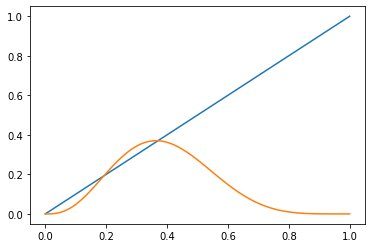

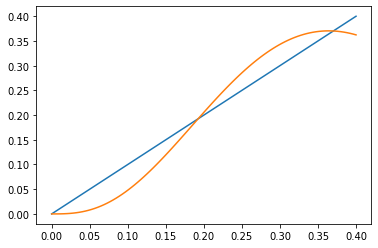

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 100)
plt.plot(p, p)
plt.plot(p, p**3*(p - 1)**5*(28.0*p - 84.0))
plt.show()

p = np.linspace(0, 0.4, 100)
plt.plot(p, p)
plt.plot(p, p**3*(p - 1)**5*(28.0*p - 84.0))
plt.show()

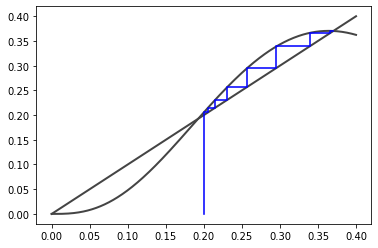

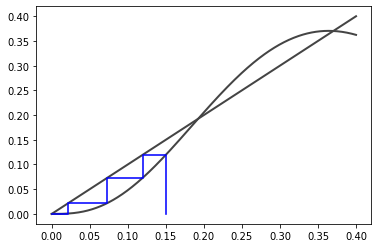

In [9]:
# addapted from https://scipython.com/blog/cobweb-plots/

def plot_cobweb(f, x0, nmax=40, interval=(0,1)):
    """Make a cobweb plot.

    Plot y = f(x) and y = x, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0.
    """
    x = np.linspace(interval[0],interval[1], 500)

    # Plot y = f(x) and y = x
    plt.plot(x, f(x), c='#444444', lw=2)
    plt.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1])
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    plt.plot(px, py, c='b', alpha=0.7)

    plt.show()

func = lambda x: x**3*(x - 1)**5*(28*x - 84)

plot_cobweb(func, 0.2, interval=(0,0.4))
plot_cobweb(func, 0.15, interval=(0,0.4))

looks like 2 equilibrium points at 0 and smth like 0.37